In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')


In [2]:
df=pd.read_csv("Resources/Data/movies.csv")
df.tail()

,movie,budge,gross,comment_count,view_count,like_count,year
548,Ride Along 2,40000000.0,90862685.0,2579,14863533,48871,2016
549,Norm of the North,18000000.0,17062499.0,0,2382637,0,2016
550,The Masked Saint,3500000.0,182695.0,8,49350,139,2016
551,The Forest,10000000.0,26594261.0,2644,6716059,20913,2016
552,Adulterers,750000.0,0.0,218,393836,989,2016


In [3]:
df["like_count%"]=df["like_count"]/df["view_count"]
df["comment_count%"]=df["comment_count"]/df["view_count"]
df.head()

,movie,budge,gross,comment_count,view_count,like_count,year,like_count%,comment_count%
0,On the Basis of Sex,20000000.0,24622687.0,2251,8111048,28827,2018,0.003554,0.000278
1,Destroyer,9000000.0,1533324.0,95,129496,661,2018,0.005104,0.000734
2,Vice,60000000.0,47836282.0,1631,2453119,13255,2018,0.005403,0.000665
3,Aquaman,160000000.0,335061807.0,94633,59057688,648092,2018,0.010974,0.001602
4,Welcome to Marwen,45000000.0,10763520.0,9197,4773419,69748,2018,0.014612,0.001927


In [4]:
df=df.replace([np.inf, -np.inf], np.nan)
df=df[df["gross"]!=0]
df.isnull().sum(axis = 0)
#check nan values

movie             0
budge             0
gross             0
comment_count     0
view_count        0
like_count        0
year              0
like_count%       0
comment_count%    0
dtype: int64

In [5]:
dataset=df.copy()
dataset.head()
X=dataset.iloc[:,[1,3,4,5,7,8]]
y=dataset.iloc[:,[2]]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


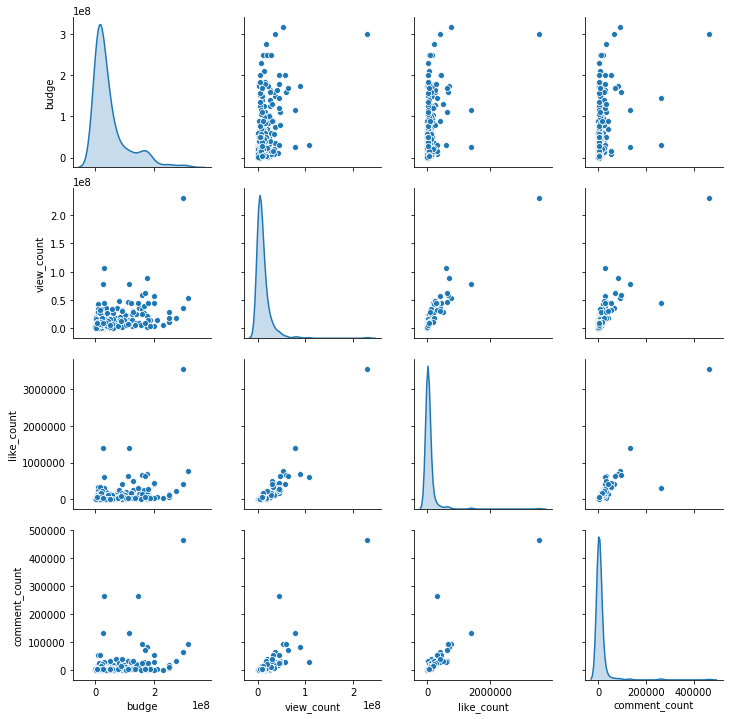

In [6]:
sns.pairplot(X_train[["budge", "view_count", "like_count","comment_count"]], diag_kind="kde")
plt.show()
#check distribution of this dataset

In [7]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats.style.format("{:.3f}")
#check stats for each factor

,count,mean,std,min,25%,50%,75%,max
budge,376.000,49414821.809,59348313.317,27000.000,10000000.000,26500000.000,60000000.000,317000000.000
comment_count,376.000,9706.561,33593.096,0.000,934.500,2566.500,6443.000,464912.000
view_count,376.000,11925813.601,17669276.593,5627.000,2917576.000,6952942.500,14532554.750,229917606.000
like_count,376.000,76755.332,230634.805,0.000,9578.000,25830.000,60935.000,3553094.000
like_count%,376.000,0.005,0.003,0.000,0.003,0.004,0.006,0.025
comment_count%,376.000,0.001,0.001,0.000,0.000,0.000,0.001,0.006


In [8]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
deep_model = Sequential()
deep_model.add(Dense(units=64, activation='relu', input_dim=6))
deep_model.add(Dense(units=64, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

W0728 16:41:07.191637 19676 deprecation.py:506] From c:\users\yumikee\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
deep_model.compile(optimizer='Adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

In [12]:
deep_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,738
Trainable params: 4,738
Non-trainable params: 0
_________________________________________________________________


In [13]:
k=deep_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
376/376 - 0s - loss: 0.9272 - mean_absolute_error: 0.9272
Epoch 2/500
376/376 - 0s - loss: 0.9263 - mean_absolute_error: 0.9263
Epoch 3/500
376/376 - 0s - loss: 0.9266 - mean_absolute_error: 0.9266
Epoch 4/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 5/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 6/500
376/376 - 0s - loss: 0.9265 - mean_absolute_error: 0.9265
Epoch 7/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 8/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 9/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 10/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 11/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 12/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 13/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 14/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 15/500
37

Epoch 117/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 118/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 119/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 120/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 121/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 122/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 123/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 124/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 125/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 126/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 127/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 128/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 129/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 130/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error:

Epoch 231/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 232/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 233/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 234/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 235/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 236/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 237/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 238/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 239/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 240/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 241/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 242/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 243/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 244/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error:

Epoch 345/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 346/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 347/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 348/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 349/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 350/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 351/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 352/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 353/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 354/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 355/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 356/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 357/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 358/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error:

Epoch 459/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 460/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 461/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 462/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 463/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 464/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 465/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 466/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 467/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 468/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 469/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 470/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 471/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error: 0.9262
Epoch 472/500
376/376 - 0s - loss: 0.9262 - mean_absolute_error:

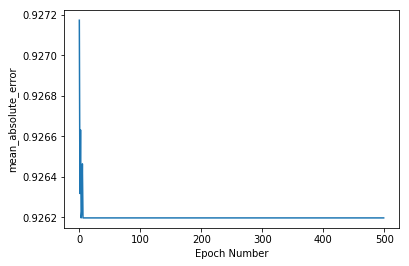

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel("mean_absolute_error")
plt.plot(k.history['loss'])

In [15]:
# def plot_history(history):
#   hist = pd.DataFrame(history.history)
#   hist['epoch'] = history.epoch

#   plt.figure()
#   plt.xlabel('Epoch')
#   plt.ylabel('Mean Abs Error [gross]')
#   plt.plot(hist['epoch'], hist['mean_absolute_error'],
#            label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#            label = 'Val Error')
#   plt.legend()

# plot_history(history)

In [16]:
# model = build_model()

# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

# plot_history(history)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_train_scaled, y_train_scaled)
#

0.9435353797192646

@!@!
R-score on train data





In [18]:
rf.score(X_test_scaled, y_test_scaled)

0.38385688164679466

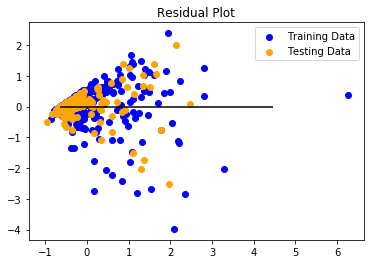

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [20]:
k.history.keys()

dict_keys(['loss', 'mean_absolute_error'])